In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [170]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
1,g__Achromobacter,g__Ramlibacter,g__Cloacibacillus,g__Cloacibacillus,g__Turicimonas,g__Segatella,g__Faecalibacterium,g__Kangiella,g_Peptostreptococcus,g_Gelria,g_Parvimonas,g_Psychroflexus,g_Cosenzaea,g_Saccharibacillus
2,g__Akkermansia,g__Proteus,g__Odoribacter,g__Simiaoa,g__Sutterella,g__Gemella,g__Agrobacterium,g__Marinospirillum,g_ Lachnospira,g_Simplicispira,g_ Peptostreptococcus,g_ Geofilum,g_ Orbus,g_ Orbus
3,g__Proteus,g__Limnohabitans,g__Anaerotignum,g__Oscillibacter,g__Anaerostipes,g__Enterocloster,g__Parabacteroides,g__Parabacteroides,g_ Lactobacillus,g_Rufibacter,g_ Bifidobacterium,g_ Phocoenobacter,g_ Malikia,g_ Phaseolibacter
4,g__Peptoniphilus,g__Peptoniphilus,g__Barnesiella,g__Paraprevotella,g__Selenomonas,g__Flavonifractor,g__Dorea,g__Dorea,g_ Centipeda,g_Meniscus,g_ Phascolarctobacterium,g_ Owenweeksia,g_ Lachnospira,g_ Cosenzaea
5,g__Treponema,g__Klebsiella,g__Oscillibacter,g__Odoribacter,g__Peptoniphilus,g__Mogibacterium,g__Solobacterium,g__Alkanindiges,g_ Solobacterium,g_Streptosporangium,g_ Anaerofustis,g_ Volucribacter,g_ Catonella,g_ Eikenella
6,g__Duodenibacillus,g__Lachnoanaerobaculum,g__Porphyromonas,g__Sphaerotilus,g__Akkermansia,g__Caproicibacterium,g__Roseburia,g__Amantichitinum,g_ Zhizhongheella,g_Mariniphaga,g_ Lactovum,g_ Providencia,g_ Desulfoconvexum,g_ Cricetibacter
7,g__Leptotrichia,g__Rhodoluna,g__Chakrabartyella,g__Azospirillum,g__Agathobacter,g__Desulfovibrio,g__Coprococcus,g__Listeria,g_ Vitreoscilla,g_Tahibacter,g_ Syntrophococcus,g_ Coenonia,g_ Cricetibacter,g_ Salinirepens
8,g__Selenomonas,g__Achromobacter,g__Paraprevotella,g__Anaerotignum,g__Blautia,g__Akkermansia,g__Alkalibacterium,g__Agrobacterium,g_ Vogesella,g_Sediminitomix,g_ Sphingobacterium,g_ Pelistega,g_ Dolosicoccus,g_ Paucimonas
9,g__Hydrogenophaga,g__Hydrogenophaga,g__Pusillibacter,g__Aquitalea,g__Vescimonas,g__Mycolicibacterium,g__Prevotella,g__Grimontia,g_ Romboutsia,g_Atopobium,g_ Bombiscardovia,g_ Thermoanaerobacterium,g_ Tamlicoccus,g_ Chthonomonas
10,g__Rhodoluna,g__Parabacteroides,g__Emergencia,g__Roseburia,g__Anaerocolumna,g__Ligilactobacillus,g__Listeria,g__Paeniclostridium,g_ Atopobium,g_ Leptotrichia,g_ Geofilum,g_ Chitinivibrio,g_ Eikenella,g_ Yimella


In [171]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_matrix.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

In [172]:
# Filter out microbes that occur only once
microbes_to_keep = microbe_counts[microbe_counts > 1].index

# Filter the original DataFrame
filtered_df = FI_matrix.applymap(lambda x: x if x in microbes_to_keep else None)

filtered_df

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24940\2470248388.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
1,None,None,g__Cloacibacillus,g__Cloacibacillus,None,None,None,None,None,None,None,None,None,None
2,g__Akkermansia,g__Proteus,g__Odoribacter,None,None,None,g__Agrobacterium,None,g_ Lachnospira,None,None,g_ Geofilum,g_ Orbus,g_ Orbus
3,g__Proteus,g__Limnohabitans,g__Anaerotignum,g__Oscillibacter,g__Anaerostipes,None,g__Parabacteroides,g__Parabacteroides,g_ Lactobacillus,None,None,None,None,None
4,g__Peptoniphilus,g__Peptoniphilus,None,g__Paraprevotella,g__Selenomonas,None,g__Dorea,g__Dorea,None,None,None,None,g_ Lachnospira,None
5,g__Treponema,g__Klebsiella,g__Oscillibacter,g__Odoribacter,g__Peptoniphilus,g__Mogibacterium,None,None,None,None,None,None,None,g_ Eikenella
6,None,g__Lachnoanaerobaculum,g__Porphyromonas,None,g__Akkermansia,g__Caproicibacterium,None,None,g_ Zhizhongheella,None,None,None,g_ Desulfoconvexum,g_ Cricetibacter
7,g__Leptotrichia,g__Rhodoluna,g__Chakrabartyella,None,g__Agathobacter,g__Desulfovibrio,None,g__Listeria,None,None,None,None,g_ Cricetibacter,None
8,g__Selenomonas,None,g__Paraprevotella,g__Anaerotignum,None,g__Akkermansia,None,g__Agrobacterium,None,None,None,None,None,None
9,g__Hydrogenophaga,g__Hydrogenophaga,g__Pusillibacter,None,g__Vescimonas,None,None,None,None,None,g_ Bombiscardovia,None,None,None
10,g__Rhodoluna,None,g__Emergencia,None,None,None,g__Listeria,None,None,None,g_ Geofilum,None,g_ Eikenella,None


In [173]:
importance_mapping_df = filtered_df.stack().reset_index()
importance_mapping_df.columns = ['importance', 'model', 'microbe']

# Create a reverse mapping from microbes to their importance values
reverse_importance_mapping = importance_mapping_df.set_index(['model', 'microbe'])['importance'].to_dict()

# Melt the DataFrame to have a single column of microbe names
melted_df = filtered_df.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

# Filter out microbes that occur only once
filtered_microbe_counts = microbe_counts[microbe_counts > 1]

# Convert the filtered counts to a DataFrame for better readability
ranked_microbes = filtered_microbe_counts.reset_index()
ranked_microbes.columns = ['microbe', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_microbes = ranked_microbes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_microbes['microbe']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=filtered_df.columns)

# Populate the DataFrame with feature importance values
for model in filtered_df.columns:
    model_microbes = filtered_df[model]
    for microbe in model_microbes:
        if (model, microbe) in reverse_importance_mapping:
            result_df.loc[microbe, model] = reverse_importance_mapping[(model, microbe)]

result_df = result_df.where(pd.notnull(result_df), None)
result_df

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
microbe,,,,,,,,,,,,,,
g__Akkermansia,2,13,None,None,6,8,None,None,None,None,None,None,None,None
g__Porphyromonas,None,None,6,18,20,18,None,None,None,None,None,None,None,None
g__Vescimonas,None,17,None,17,9,None,None,None,None,None,None,None,None,None
g__Rhodoluna,10,7,19,None,None,None,None,None,None,None,None,None,None,None
g__Peptoniphilus,4,4,None,None,5,None,None,None,None,None,None,None,None,None
g__Selenomonas,8,16,None,None,4,None,None,None,None,None,None,None,None,None
g__Vibrio,None,None,11,20,None,11,None,None,None,None,None,None,None,None
g__Lachnoanaerobaculum,17,6,None,None,13,None,None,None,None,None,None,None,None,None
g__Oscillibacter,None,None,5,3,None,13,None,None,None,None,None,None,None,None


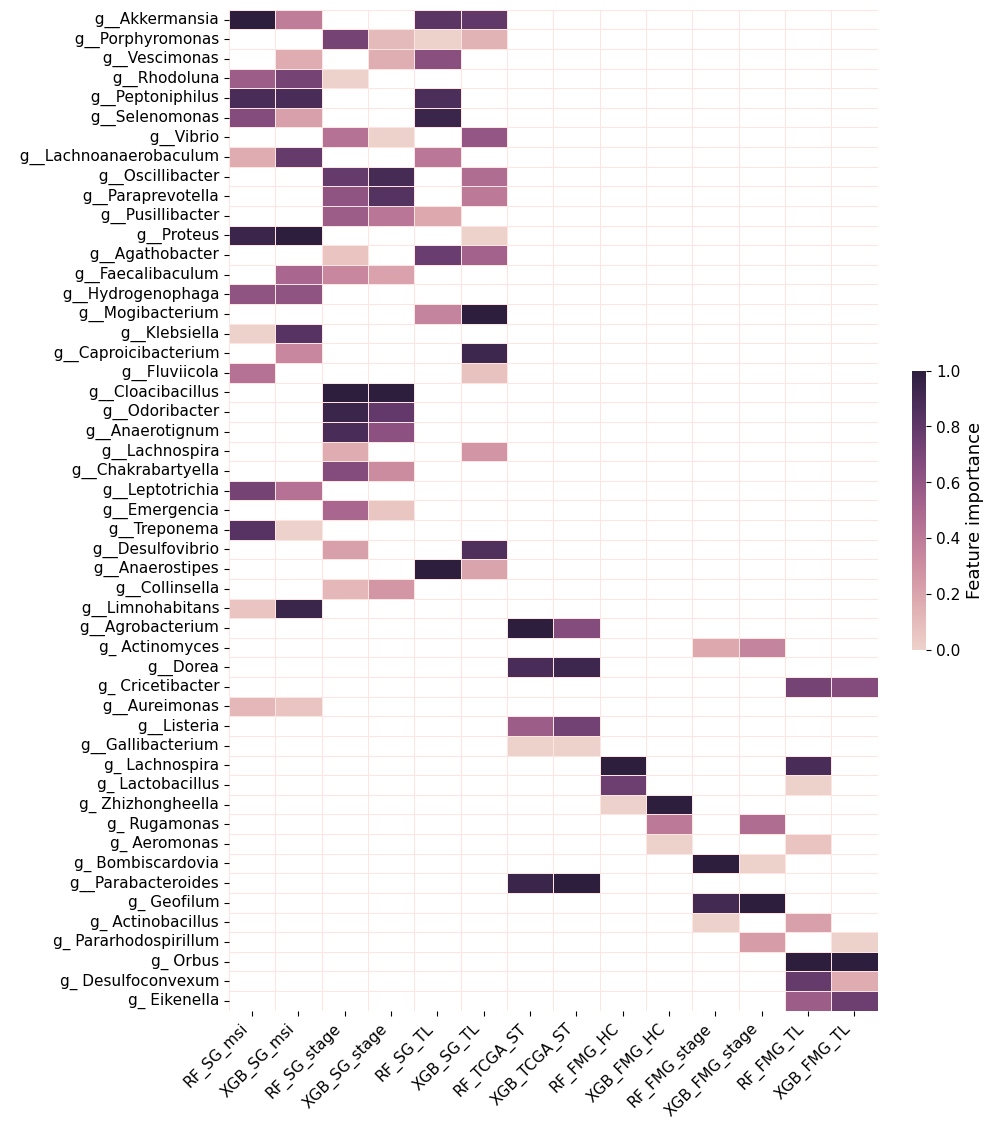

In [182]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')
#result_df.fillna(0, inplace=True)  # Replace NaN with 0 for scaling

# Apply Min-Max Scaling and invert the result
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(result_df)
inverted_scaled_df = 1 - scaled_df  # Inverting the scaled values

# Convert to DataFrame
normalized_df = pd.DataFrame(inverted_scaled_df, index=result_df.index, columns=result_df.columns)


# Fill NaN values with 0 if necessary
#normalized_df = normalized_df.fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(9, 13))
cmap = sns.cubehelix_palette(as_cmap=True)
heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Feature importance', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')
# Adjust the color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Feature importance', fontsize=13)  # Change 'fontsize' to your desired size

# Optionally adjust the tick label size if needed
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Display the heatmap
plt.show()

In [166]:
print(result_df.index)

Index(['  g__Akkermansia', '  g__Porphyromonas', '  g__Vescimonas',
       '  g__Rhodoluna', '  g__Peptoniphilus', '  g__Selenomonas',
       '  g__Vibrio', '  g__Lachnoanaerobaculum', '  g__Oscillibacter',
       '  g__Paraprevotella', '  g__Pusillibacter', '  g__Proteus',
       '  g__Agathobacter', '  g__Faecalibaculum', '  g__Hydrogenophaga',
       '  g__Mogibacterium', '  g__Klebsiella', '  g__Caproicibacterium',
       '  g__Fluviicola', ' g__Cloacibacillus', '  g__Odoribacter',
       '  g__Anaerotignum', '  g__Lachnospira', '  g__Chakrabartyella',
       '  g__Leptotrichia', '  g__Emergencia', '  g__Treponema',
       '  g__Desulfovibrio', '  g__Anaerostipes', '  g__Collinsella',
       '  g__Limnohabitans', 'g_ Lachnospira', 'g_ Cricetibacter',
       'g_ Zhizhongheella', ' g__Listeria', '  g__Aureimonas', 'g_ Rugamonas',
       'g_ Aeromonas', 'g_ Bombiscardovia', 'g_ Geofilum', 'g_ Actinomyces',
       'g_ Actinobacillus', 'g_ Pararhodospirillum', 'g_ Orbus',
       'g_ Lac

In [175]:
normalized_df.columns

Index(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC',
       'RF_FMG_stage', 'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'],
      dtype='object', name='FI')